In [92]:
# We put our code here!

In [93]:
with open('./YelpAPIKeys.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1

In [94]:
print(CLIENT_ID,"\n",API_KEY)

UFH0gcOYhVYWXEqxTXqoiQ 
 ovv6T1Nhr_IMsxMQWLbe2K1kbo2AELjJ09yqk0VkiZcvdpksEqs1q4SoOpfLLUPxsHHz5tq5_oShbmfunhpn9G2qeY_xeGMqdwgTMYC2sWVXu9uULmqi32aAI-3ZW3Yx


In [95]:
API_HOST = 'https://api.yelp.com' 
SEARCH_PATH = '/v3/businesses/search' 
BUSINESS_PATH = '/v3/businesses/'

In [96]:
!pip install requests

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [97]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [98]:
rests = get_restaurants(API_KEY,"Chinatown, New York, NY")
rests

[{'id': '0CjK3esfpFcxIopebzjFxA',
  'alias': 'joes-shanghai-new-york-2',
  'name': "Joe's Shanghai",
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/ekUo5egd4dlE7zJyb4-Leg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/joes-shanghai-new-york-2?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ',
  'review_count': 5509,
  'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'},
   {'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.7146691442891,
   'longitude': -73.9977602206654},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '9 Pell St',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['9 Pell St', 'New York, NY 10013']},
  'phone': '+12122338888',
  'displa

In [99]:
!pip install bs4 

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
from bs4 import BeautifulSoup
import requests

In [101]:
# get all restaurants attributes
# all_rests = dict()
all_rests = list()

for i in rests:
    
    each_rest = dict()
    
    # for attributes from API
#     name = i['name']

    each_rest['name'] = i['name']
    each_rest['categories'] = i['categories']
    each_rest['rating'] = i['rating']
    each_rest['distance'] = i['distance']
    each_rest['is_closed'] = i['is_closed']
    each_rest['location'] = i['location']
    
    # for attributes from web scraping url
    url = i['url']
    try: 
        response = requests.get(url)
        results_page = BeautifulSoup(response.content,'lxml') 
        info = results_page.find_all('div',class_="ywidget")[2].find_all('dl')
        
        for i in info:
            r = i.find('dt').get_text().strip(' ')[33:-1]
            v = i.find('dd').get_text().strip(' ')[33:-1]
            each_rest[r] = v

        price = results_page.find_all('div',class_="price-category")[0].find_all('span')[1].get_text()
        
        if price =='$' or price == '$$' or price == '$$$' or price == '$$$$':
            each_rest['price']= price 
            
        else: 
            price = results_page.find_all('div',class_="price-category")[1].find_all('span')[1].get_text()
            each_rest['price']= price 


#         all_rests[name] = each_rest
        all_rests.append(each_rest)
    
    except:
        pass

all_rests

[{'name': "Joe's Shanghai",
  'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'},
   {'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
  'rating': 4.0,
  'distance': 176.17294074236378,
  'is_closed': False,
  'location': {'address1': '9 Pell St',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['9 Pell St', 'New York, NY 10013']},
  'd by Vegetarians': '',
  'Takes Reservations': 'No',
  'Delivery': 'No',
  'Take-out': 'Yes',
  'Accepts Credit Cards': 'No',
  'Accepts Apple Pay': 'No',
  'Accepts Google Pay': 'No',
  'Good For': 'Lunch, Dinner',
  'Parking': 'Street',
  'Bike Parking': 'No',
  'Good for Kids': 'Yes',
  'Good for Groups': 'Yes',
  'Attire': 'Casual',
  'Ambience': 'Casual',
  'Noise Level': 'Loud',
  'Alcohol': 'Beer & Wine Only',
  'Happy Hour': 'No',
  'Outdoor Seating': 'No',
  'Wi-Fi': 'No',
  'Has TV': '

In [102]:
# for algorithm

In [103]:
!pip install pandas
!pip install numpy
!pip install re

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [104]:
# import user data
import pandas as pd
import numpy
import re
customer_df = pd.read_csv('test.csv', header= 0)
# customer_df.set_index("User", inplace= True)

In [105]:
#normalize all value in dictionary to list use recursion
def flatten(a):
    new_list = []
    if isinstance(a,list):
        for item in a:
        # Look at each item in iterable. 
            if isinstance(item, dict):  
            # If the item is a list, then flatten that list
                flattened_inner_list = flatten(item)
                new_list.extend(flattened_inner_list)
            else:
            # If the item is not a list, just append it to the growing flat list that will be returned.
                new_list.append(item)
    
    if isinstance(a,dict):
        new_list = list(a.values())
    else:
         new_list.append(a)
    return new_list

In [106]:


def if_match(key,preference):
    #rep = r'\b\w+'
    pattern = re.compile(r''+key+'')
    string = preference
    match = pattern.search(string)
    return bool(match)

In [107]:
#score algo blueprint. goddam hard core function.... how to optimize run time?
s = dict()
def score (rests, customer_df):

    for i in range (len(rests)): 
        #print(i)
        count_1 = 0
        count_2 = 0
        count_3 = 0
        for key in rests[i].keys():
#         for key in rests[i]:
            for p in range (len(customer_df.columns)):
                #print(key)
                if if_match(key.lower(), customer_df.columns[p].lower()) == True:
                    #print(key)
                    for v in customer_df.iloc[:,p]:
                        #print(type(v))
                        if type(v) == numpy.float64:
                            if v<=rests[i].get(key):
                                #print('Yes')
                                count_1 = count_1 + 1 
                                #print(count_1)
                        if customer_df.columns[p] == 'price':
                            if len(v) >= len(rests[i].get(key)):
                                count_3 = count_3 + 1
                                #print(count_3)
                            
                        else:
                            if type(v) != numpy.float64:
                                if v in flatten(rests[i].get(key)):
                                    #print(v)
                                    count_2 = count_2 + 1
                                    #print(count_2)
        count = count_1+count_2+count_3
        #print(count)
        if rests[i].get('is_closed') == False:
            #s.update({rests[i].get('name'):count})
            s.update({i:count})
    return s

In [108]:
a = score(all_rests, customer_df)

def final(s, rests):
    
    s_sorted = sorted(s, key=s.get, reverse=True)
    df = pd.concat([pd.DataFrame({'name': [rests[r].get('name')],
                   'contact number': [rests[r].get('phone')],
                   'address': [rests[r]['location'].get('display_address')]}) 
        for r in s_sorted], ignore_index=True)
    df = df[['name','contact number','address']]
    df = df.head(3).T
    #print ('Best match for your group')
    return(df)
    
b = str(final (a,all_rests))

In [109]:
# for sending message to users

In [110]:
!pip install twilio

    100% |████████████████████████████████| 931kB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 4.5MB/s eta 0:00:01
  Running setup.py install for pysocks ... done
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [111]:
from twilio.rest import Client

In [112]:
client = Client("AC58e6b883eca330c754e0c1f915aa1f72", "7e67902756dfa25441cfdf633a55e797")
client.messages.create(to="+19095529993",
                       from_="+16162013721",
                       body=b)

<Twilio.Api.V2010.MessageInstance account_sid=AC58e6b883eca330c754e0c1f915aa1f72 sid=SM6d965663e2864363beb9b2269646e773>

In [113]:
# scraping resturant comment from web page

In [114]:
comments = []
# url = 'https://www.yelp.com/biz/dun-huang-new-york-3?adjust_creative=VVa4Tzh6TGZIVHX1gp6xFQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=VVa4Tzh6TGZIVHX1gp6xFQ'
url = 'https://www.yelp.com/biz/shinsen-new-york?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ'
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml') 
comments_tag = results_page.find_all('div',class_="review-content")
    
for comment_tag in comments_tag:
    comment = comment_tag.find('p').get_text()
    comments.append(comment)
    
comments

["Seriously the best sushi dishes I've tried this year! I love sushi! I generally frequent Sushi Yasuda, Sugarfish, & KazuNori but now Shinsen is top on my list. Went for lunch and now can't wait to go back and bring friends and family here. I'm salivating as I'm writing this. I'll probably be back sooner than later. Theresa and Tony, the owners, are so nice to boot!I tried the following & highly recommend them:- Ahi Tower- Salmon Osaka- Scallop & Avocado topped with roe- Yellowtail sushi- Egg sushi- Uni sushiSake, recommended by Theresa, was smooth and so easy to drink. Perfect paired with the sushi.",
 "Service was great and inviting, laid back vibes that matched the rustic atmosphere and warm lighting. There's also a corner designated area for coffee and free Wi-Fi. You also get one free uni piece if you check into Yelp! The best dish we've had was the toro crab roll - you can actually taste the usual melty tuna belly. However, we've ordered several other rolls and a bowl and felt t

In [115]:
# generate whole text of comment for word cloud and for emotion analyzer
comm = ''
for i in range(len(comments)):
    comm += comments[i]

In [116]:
# read NRC data to form an emotion dictionary
nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [117]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    # get all emotion from dictionary
    emotions = set()
    for y in emotion_dict.values():
        for x in y:
            emotions.add(x)
    # count number of appearance of emotion
    emotion_count = dict()
    for emotion in emotions: 
        emotion_count[emotion] = 0
        
    total_words = len(text.split()) 
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1
    
    total_emotion_count = sum(emotion_count.values())
    
    # calculate percentage
    for e in emotion_count:
        emotion_count[e] = emotion_count[e]/total_emotion_count
        
    sorted_by_value = sorted(emotion_count.items(), key=lambda x: x[1],reverse=True)
    
    return sorted_by_value

# check last two lines

In [118]:
comment_emotion = emotion_analyzer(comm)
comment_emotion

[('positive', 0.3005050505050505),
 ('trust', 0.18434343434343434),
 ('joy', 0.17676767676767677),
 ('anticipation', 0.14898989898989898),
 ('negative', 0.06060606060606061),
 ('surprise', 0.05808080808080808),
 ('disgust', 0.027777777777777776),
 ('sadness', 0.020202020202020204),
 ('anger', 0.012626262626262626),
 ('fear', 0.010101010101010102)]

In [119]:
# for comment word cloud

In [120]:
!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


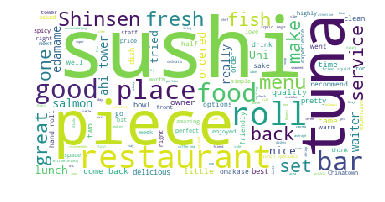

In [121]:
# generate whole text of comment for word cloud and for 
comm = ''
for i in range(len(comments)):
    comm += comments[i]
    
# generate word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(comm)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [122]:
# for resturant location map

In [123]:
!pip install folium

    100% |████████████████████████████████| 92kB 2.4MB/s ta 0:00:011
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [125]:
import folium
m = folium.Map(location=[40.8075,-73.9626],zoom_start=14)
folium.Marker([40.8075,-73.9626],popup="Columbia University").add_to(m)
m